In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np

# Paths to dataset folders
base_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat-Dataset\images'
folders = ['train', 'test', 'val']  # The three splits

# Initialize an empty list to hold data
data = []

# Process each folder
for split in folders:
    folder_path = os.path.join(base_path, split)
    for file_name in os.listdir(folder_path):
        if file_name.endswith(('jpg', 'png', 'jpeg')):  # Ensure it's an image file
            # Extract label from the file name
            label = file_name.split('-')[0]  # Assuming label is before the first underscore
            
            # Load the image and convert to pixel values
            image_path = os.path.join(folder_path, file_name)
            image = Image.open(image_path).convert('RGB')  # Ensure RGB format
            pixel_values = np.array(image).flatten()  # Flatten pixel values into a 1D array
            
            # Append data to the list
            data.append({
                'split': split,
                'label': label,
                **{f'pixel_{i}': val for i, val in enumerate(pixel_values)}
            })

# Convert the list of data to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
output_path = 'HydroFloat_dataset.csv'
df.to_csv(output_path, index=False)
print(f"CSV file created successfully at: {output_path}")


MemoryError: 

In [2]:
#Memory error solved

import os
import csv
from PIL import Image
import numpy as np

# Paths to dataset folders
base_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat-Dataset\images'
folders = ['train', 'test', 'val']  # The three splits

# Output CSV file
output_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset.csv'

# Initialize the CSV file and write headers
with open(output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['split', 'label'] + [f'pixel_{i}' for i in range(3 * 224 * 224)])  # Adjust resolution if necessary

# Process each folder
    for split in folders:
        folder_path = os.path.join(base_path, split)
        for file_name in os.listdir(folder_path):
            if file_name.endswith(('jpg', 'png', 'jpeg')):  # Ensure it's an image file
                # Extract label from the file name
                label = file_name.rsplit('-', 1)[0]  # Get the part before the last hyphen

                # Load the image, resize, and flatten pixel values
                image_path = os.path.join(folder_path, file_name)
                image = Image.open(image_path).convert('RGB')  # Ensure RGB format
                image = image.resize((224, 224))  # Resize to a smaller resolution
                pixel_values = np.array(image).flatten()  # Flatten pixel values into a 1D array

                # Write a row to the CSV file
                writer.writerow([split, label] + pixel_values.tolist())

print(f"CSV file created successfully at: {output_path}")


CSV file created successfully at: E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset.csv


In [1]:
import os
import csv
from PIL import Image
import numpy as np

# Paths to dataset folders
base_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat-Dataset\images'
folders = ['train', 'test', 'val']  # The three splits

# Output CSV file
output_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_optimized.csv'

# Image resolution for resizing
resize_resolution = (64, 64)  # Reduce resolution to 64x64

# Initialize the CSV file and write headers
with open(output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['split', 'label'] + [f'pixel_{i}' for i in range(3 * resize_resolution[0] * resize_resolution[1])])  # Adjust resolution

# Process each folder
    for split in folders:
        folder_path = os.path.join(base_path, split)
        for file_name in os.listdir(folder_path):
            if file_name.endswith(('jpg', 'png', 'jpeg')):  # Ensure it's an image file
                # Extract label from the file name
                label = file_name.rsplit('-', 1)[0]  # Get the part before the last hyphen

                # Load the image, resize, normalize, and flatten pixel values
                image_path = os.path.join(folder_path, file_name)
                image = Image.open(image_path).convert('RGB')  # Ensure RGB format
                image = image.resize(resize_resolution)  # Resize to smaller resolution
                pixel_values = (np.array(image) / 255.0).flatten().astype(np.float32)  # Normalize to 0-1

                # Write a row to the CSV file
                writer.writerow([split, label] + pixel_values.tolist())

print(f"Optimized CSV file created successfully at: {output_path}")


Optimized CSV file created successfully at: E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_optimized.csv


In [2]:
import pandas as pd

# Input and output file paths
input_csv_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_optimized.csv'
output_csv_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_updated.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(input_csv_path)

# Function to clean and update labels
def clean_label(label):
    # Remove unwanted characters or numbers
    label = ''.join(filter(str.isalpha, label))  # Keep only alphabetic characters
    
    # Replace specific patterns
    label = label.replace('v', 'garbage patch')  # Replace 'v' with 'garbage patch'
    label = label.replace('bb', 'plastic bottles')  # Replace 'bb' with 'plastic bottles'
    label = label.replace('ylg', 'metal container')  # Replace 'ylg' with 'container'
    label = label.replace('.jpg', '')  # Remove '.jpg' from the label
    
    return label

# Apply the cleaning function to the label column
df['label'] = df['label'].apply(clean_label)

# Save the updated DataFrame to a new CSV file
df.to_csv(output_csv_path, index=False)

print(f"Updated CSV file saved at: {output_csv_path}")


Updated CSV file saved at: E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_updated.csv


In [4]:
#Final label update

import pandas as pd

# Input and output file paths
input_csv_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_updated.csv'
output_csv_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_final.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(input_csv_path)

# Function to clean the labels further
def refine_label(label):
    # Remove 'jpg' at the end, if present
    if label.endswith('jpg'):
        label = label[:-3]
    
    # Remove 'a' at the beginning, if present
    if label.startswith('A'):
        label = label[1:]
    
    return label.strip()  # Remove any extra spaces

# Apply the refinement function to the label column
df['label'] = df['label'].apply(refine_label)

# Save the updated DataFrame to a new CSV file
df.to_csv(output_csv_path, index=False)

print(f"Final updated CSV file saved at: {output_csv_path}")


Final updated CSV file saved at: E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_final.csv


Pre-Processing the dataset

In [6]:
#Pre-processed dataset

import pandas as pd

# Load the dataset
file_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_final.csv'  # Update with the path to your dataset
df = pd.read_csv(file_path)

# 1. Check for null values
print("Checking for null values...")
null_counts = df.isnull().sum()
print(null_counts)

# Handle null values
if null_counts.any():
    print("Handling null values...")
    # Option 1: Drop rows with null values
    df = df.dropna()

    # Option 2: Fill null values (uncomment if needed)
    # df['split'] = df['split'].fillna('unknown')  # Replace with default value for 'split'
    # df['label'] = df['label'].fillna('unknown')  # Replace with default value for 'label'
    # df.iloc[:, 2:] = df.iloc[:, 2:].fillna(0)  # Fill missing pixel values with 0

# 2. Check for duplicate rows
print("Checking for duplicate rows...")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicate rows if any
if duplicate_count > 0:
    print("Removing duplicate rows...")
    df = df.drop_duplicates()

# 3. Check for inconsistent or unexpected values in 'split' and 'label'
print("Checking for unexpected values in 'split' and 'label' columns...")
print("Unique values in 'split':", df['split'].unique())
print("Unique values in 'label':", df['label'].unique())

# 4. Normalize 'split' column (Optional: standardize split names)
valid_splits = ['train', 'test', 'val']
df = df[df['split'].isin(valid_splits)]  # Remove rows with invalid 'split' values

# 5. Pixel value checks (ensure all are numeric)
print("Checking pixel values...")
pixel_columns = df.columns[2:]  # All pixel columns
non_numeric_pixels = df[pixel_columns].applymap(lambda x: not isinstance(x, (int, float))).sum().sum()
print(f"Non-numeric pixel values: {non_numeric_pixels}")

# Convert all pixel values to numeric, coercing errors to NaN
df[pixel_columns] = df[pixel_columns].apply(pd.to_numeric, errors='coerce')

# Handle any resulting NaN pixel values (if coercion introduced NaN values)
df[pixel_columns] = df[pixel_columns].fillna(0)

# 6. Save the cleaned and preprocessed dataset
output_file_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_preprocessed.csv'
df.to_csv(output_file_path, index=False)
print(f"Preprocessed dataset saved at: {output_file_path}")


Checking for null values...
split          0
label          0
pixel_0        0
pixel_1        0
pixel_2        0
              ..
pixel_12283    0
pixel_12284    0
pixel_12285    0
pixel_12286    0
pixel_12287    0
Length: 12290, dtype: int64
Checking for duplicate rows...
Number of duplicate rows: 3
Removing duplicate rows...
Checking for unexpected values in 'split' and 'label' columns...
Unique values in 'split': ['train' 'test' 'val']
Unique values in 'label': ['bag' 'deadfish' 'xdeadfish' 'xinbag' 'plastic bottles' 'fish'
 'garbage patch' 'waterhyacinth' 'container']
Checking pixel values...


C:\Users\Sushmita Aich\AppData\Local\Temp\ipykernel_2280\1567348412.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_pixels = df[pixel_columns].applymap(lambda x: not isinstance(x, (int, float))).sum().sum()


Non-numeric pixel values: 0
Preprocessed dataset saved at: E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_preprocessed.csv


In [3]:
import pandas as pd

output_file_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_preprocessed.csv'
df = pd.read_csv(output_file_path)
df.head()

split label   pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5  \
0  train   bag  0.490196  0.486275  0.478431  0.509804  0.501961  0.494118   
1  train   bag  0.058824  0.058824  0.058824  0.062745  0.062745  0.062745   
2  train   bag  0.098039  0.098039  0.098039  0.098039  0.098039  0.098039   
3  train   bag  0.490196  0.494118  0.509804  0.509804  0.494118  0.505882   
4  train   bag  0.207843  0.207843  0.207843  0.207843  0.207843  0.207843   

    pixel_6   pixel_7  ...  pixel_12278  pixel_12279  pixel_12280  \
0  0.525490  0.509804  ...     0.419608     0.443137     0.427451   
1  0.070588  0.070588  ...     0.117647     0.109804     0.105882   
2  0.098039  0.098039  ...     0.098039     0.098039     0.098039   
3  0.521569  0.505882  ...     0.419608     0.443137     0.427451   
4  0.207843  0.207843  ...     0.207843     0.207843     0.207843   

   pixel_12281  pixel_12282  pixel_12283  pixel_12284  pixel_12285  \
0     0.431373     0.443137     0.427451     0.435294     0.423529   
1     0.101961     0.098039     0.094118     0.094118     0.090196   
2     0.098039     0.098039     0.098039     0.098039     0.098039   
3     0.431373     0.439216     0.423529     0.435294     0.431373   
4     0.207843     0.207843     0.207843     0.207843     0.207843   

   pixel_12286  pixel_12287  
0     0.411765     0.419608  
1     0.090196     0.090196  
2     0.098039     0.098039  
3     0.415686     0.431373  
4     0.207843     0.207843  

[5 rows x 12290 columns]

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

df.head()

Label Mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8)}


split  label   pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5  \
0  train      0  0.490196  0.486275  0.478431  0.509804  0.501961  0.494118   
1  train      0  0.058824  0.058824  0.058824  0.062745  0.062745  0.062745   
2  train      0  0.098039  0.098039  0.098039  0.098039  0.098039  0.098039   
3  train      0  0.490196  0.494118  0.509804  0.509804  0.494118  0.505882   
4  train      0  0.207843  0.207843  0.207843  0.207843  0.207843  0.207843   

    pixel_6   pixel_7  ...  pixel_12278  pixel_12279  pixel_12280  \
0  0.525490  0.509804  ...     0.419608     0.443137     0.427451   
1  0.070588  0.070588  ...     0.117647     0.109804     0.105882   
2  0.098039  0.098039  ...     0.098039     0.098039     0.098039   
3  0.521569  0.505882  ...     0.419608     0.443137     0.427451   
4  0.207843  0.207843  ...     0.207843     0.207843     0.207843   

   pixel_12281  pixel_12282  pixel_12283  pixel_12284  pixel_12285  \
0     0.431373     0.443137     0.427451     0.435294     0.423529   
1     0.101961     0.098039     0.094118     0.094118     0.090196   
2     0.098039     0.098039     0.098039     0.098039     0.098039   
3     0.431373     0.439216     0.423529     0.435294     0.431373   
4     0.207843     0.207843     0.207843     0.207843     0.207843   

   pixel_12286  pixel_12287  
0     0.411765     0.419608  
1     0.090196     0.090196  
2     0.098039     0.098039  
3     0.415686     0.431373  
4     0.207843     0.207843  

[5 rows x 12290 columns]

In [10]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Load the CSV dataset
csv_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_preprocessed.csv'
data = pd.read_csv(csv_path)

# Separate pixel values and labels
pixel_columns = [col for col in data.columns if col.startswith("pixel_")]

# Split the dataset based on the "split" column
train_data = data[data["split"] == "train"]
val_data = data[data["split"] == "val"]
test_data = data[data["split"] == "test"]

# Extract features (pixel values) and labels for train, val, and test sets
X_train = train_data[pixel_columns].values
y_train = train_data["label"].values

X_val = val_data[pixel_columns].values
y_val = val_data["label"].values

X_test = test_data[pixel_columns].values
y_test = test_data["label"].values

# Encode labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Normalize pixel values (already between 0-1 in this case, but for completeness)
X_train = X_train.astype("float32")
X_val = X_val.astype("float32")
X_test = X_test.astype("float32")

# Define the model
model = Sequential([
    Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
epochs = 20
batch_size = 32

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model and label encoder
model.save("pollutant_detection_model.h5")

import joblib
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model and label encoder saved successfully.")


c:\Users\Sushmita Aich\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.1863 - loss: 4.9909 - val_accuracy: 0.3527 - val_loss: 1.9007
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3114 - loss: 1.9402 - val_accuracy: 0.3728 - val_loss: 1.9043
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.3120 - loss: 1.8919 - val_accuracy: 0.2388 - val_loss: 2.0465
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.2408 - loss: 2.0061 - val_accuracy: 0.2388 - val_loss: 2.0386
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.2251 - loss: 1.9952 - val_accuracy: 0.2388 - val_loss: 2.0805
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.2137 - loss: 2.0143 - val_accuracy: 0.2388 - val_loss: 2.0420
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.2081 - loss: 2.0110 - val_accuracy: 0.1875 - val_loss: 2.0441
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.2374 - loss: 1.9920 - val_accu

Test Accuracy: 20.27%
Model and label encoder saved successfully.


In [12]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Load the CSV dataset
csv_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_preprocessed.csv'
data = pd.read_csv(csv_path)

# Separate pixel values and labels
pixel_columns = [col for col in data.columns if col.startswith("pixel_")]
X = data[pixel_columns].values
y = data["label"].values

# Encode labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize pixel values (already between 0-1 in this case, but for completeness)
X = X.astype("float32")

# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 20% for test+val
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 10% each

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = Sequential([
    Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
epochs = 20
batch_size = 32

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model and label encoder
model.save("pollutant_detection_model_natural_split.h5")

import joblib
joblib.dump(label_encoder, "label_encoder_natural_split.pkl")

print("Model and label encoder saved successfully.")


Epoch 1/20


c:\Users\Sushmita Aich\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.1626 - loss: 6.1067 - val_accuracy: 0.3795 - val_loss: 2.0554
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.2722 - loss: 2.0179 - val_accuracy: 0.3929 - val_loss: 1.8768
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3035 - loss: 1.9145 - val_accuracy: 0.4062 - val_loss: 1.8051
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3266 - loss: 1.8719 - val_accuracy: 0.4048 - val_loss: 1.7546
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3216 - loss: 1.8545 - val_accuracy: 0.4048 - val_loss: 1.7749
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3208 - loss: 1.8481 - val_accuracy: 0.3943 - val_loss: 1.7891
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.3149 - loss: 1.8725 - val_accuracy: 0.3988 - val_loss: 1.7699
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3199 - loss: 1.8616 - val_accuracy: 0.4048 - val_loss: 1.

Test Accuracy: 39.38%
Model and label encoder saved successfully.


In [2]:
import os
import numpy as np
from PIL import Image
import csv

# Define paths
base_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Oil_Spill'
splits = ['train', 'test', 'val']
label_colors_path = os.path.join(base_path, 'label_colors.txt')
output_csv = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Oil_Spill_dataset.csv'

# RGB color codes for labels from label_colors.txt
label_colors = {
    'background': (0, 0, 0),
    'oil': (255, 0, 124),
    'others': (255, 204, 51),
    'water': (51, 221, 255)
}

# Create output CSV
with open(output_csv, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    # Write header
    writer.writerow(['split', 'label'] + [f'pixel_{i}' for i in range(64 * 64 * 3)])  # 3 for RGB channels

    for split in splits:
        images_folder = os.path.join(base_path, split, 'images')
        masks_folder = os.path.join(base_path, split, 'masks')

        for image_name in os.listdir(images_folder):
            if image_name.endswith('.jpg'):
                # Process original image
                image_path = os.path.join(images_folder, image_name)
                with Image.open(image_path).convert('RGB') as img:
                    img = img.resize((64, 64))
                    image_pixels = np.array(img).flatten() / 255.0  # Normalize to [0, 1]

                # Process mask
                mask_name = image_name.replace('.jpg', '.png')
                mask_path = os.path.join(masks_folder, mask_name)
                if os.path.exists(mask_path):
                    with Image.open(mask_path).convert('RGB') as mask_img:
                        # Save mask as JPG
                        mask_jpg_path = os.path.join(masks_folder, mask_name.replace('.png', '.jpg'))
                        mask_img.save(mask_jpg_path, 'JPEG')

                        mask_array = np.array(mask_img)
                        oil_color = label_colors['oil']
                        oil_present = np.any(np.all(mask_array == oil_color, axis=-1))  # Check for oil pixels

                        label = 'oil_spill' if oil_present else 'no_oil_spill'

                        # Write row to CSV
                        writer.writerow([split, label] + image_pixels.tolist())
                        print(f"Processed: {image_name} -> Label: {label}")

print(f"CSV file created at: {output_csv}")


Processed: Oil (1).jpg -> Label: oil_spill
Processed: Oil (10).jpg -> Label: no_oil_spill
Processed: Oil (100).jpg -> Label: no_oil_spill
Processed: Oil (1000).jpg -> Label: oil_spill
Processed: Oil (1001).jpg -> Label: oil_spill
Processed: Oil (1002).jpg -> Label: oil_spill
Processed: Oil (1003).jpg -> Label: oil_spill
Processed: Oil (1004).jpg -> Label: oil_spill
Processed: Oil (1005).jpg -> Label: oil_spill
Processed: Oil (1006).jpg -> Label: oil_spill
Processed: Oil (1009).jpg -> Label: oil_spill
Processed: Oil (101).jpg -> Label: no_oil_spill
Processed: Oil (1010).jpg -> Label: oil_spill
Processed: Oil (1011).jpg -> Label: oil_spill
Processed: Oil (1012).jpg -> Label: oil_spill
Processed: Oil (1013).jpg -> Label: oil_spill
Processed: Oil (1015).jpg -> Label: oil_spill
Processed: Oil (1016).jpg -> Label: oil_spill
Processed: Oil (1017).jpg -> Label: oil_spill
Processed: Oil (1018).jpg -> Label: oil_spill
Processed: Oil (102).jpg -> Label: no_oil_spill
Processed: Oil (1020).jpg -> L

In [10]:
import os
import csv
from PIL import Image
import numpy as np

# Define paths
base_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Oil_Spill'
splits = ['train', 'test', 'val']
label_colors_path = os.path.join(base_path, 'label_colors.txt')
output_csv = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Oil_Spill_dataset.csv'

# RGB color codes for labels from label_colors.txt
label_colors = {
    'background': (0, 0, 0),
    'oil': (255, 0, 124),
    'others': (255, 204, 51),
    'water': (51, 221, 255)
}

# Function to check for oil spill in masks
def contains_oil_spill(mask_path):
    mask = Image.open(mask_path)
    mask_data = np.array(mask)
    oil_color = label_colors['oil']
    return np.any(np.all(mask_data == oil_color, axis=-1))

# Prepare CSV file
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['split', 'label'] + [f'pixel_{i}' for i in range(64 * 64 * 3)])

    # Process each split folder
    for split in ['train', 'test', 'val']:
        images_folder = os.path.join(base_path, split, 'images')
        masks_folder = os.path.join(base_path, split, 'masks')

        for image_name in os.listdir(images_folder):
            if image_name.endswith(('.jpg', '.jpeg')):
                image_path = os.path.join(images_folder, image_name)
                mask_path = os.path.join(masks_folder, image_name.replace('.jpg', '.png').replace('.jpeg', '.png'))

                # Convert image to PNG format temporarily
                with Image.open(image_path).convert('RGB') as img:
                    img_resized = img.resize((64, 64))  # Resize to 64x64
                    pixel_values = np.array(img_resized).flatten() / 255.0  # Normalize pixel values

                # Determine label based on mask
                label = 'oil_spill' if contains_oil_spill(mask_path) else 'no_oil_spill'

                # Write a row to the CSV file
                writer.writerow([split, label] + pixel_values.tolist())

print(f"CSV file created successfully at: {output_csv}")


CSV file created successfully at: E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Oil_Spill_dataset.csv


In [1]:
import pandas as pd

# File paths
oil_spill_csv = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Oil_Spill_dataset.csv'
hydrofloat_csv = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat_dataset_preprocessed.csv'
output_csv = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Merged_Dataset.csv'

# Load the datasets
oil_spill_df = pd.read_csv(oil_spill_csv)
hydrofloat_df = pd.read_csv(hydrofloat_csv)

# Drop the image_name column from Oil_Spill dataset
if 'image_name' in oil_spill_df.columns:
    oil_spill_df = oil_spill_df.drop(columns=['image_name'])

# Verify the structures match
if list(oil_spill_df.columns) != list(hydrofloat_df.columns):
    raise ValueError("The structures of the datasets do not match. Ensure columns are aligned before merging.")

# Merge the datasets row-wise
merged_df = pd.concat([oil_spill_df, hydrofloat_df], ignore_index=True)

# Save the merged dataset
merged_df.to_csv(output_csv, index=False)
print(f"Merged dataset saved as {output_csv}")


Merged dataset saved as E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Merged_Dataset.csv


In [4]:
#Pre-processed dataset

import pandas as pd

# Load the dataset
file_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Merged_Dataset.csv'  # Update with the path to your dataset
df = pd.read_csv(file_path)

# 1. Check for null values
print("Checking for null values...")
null_counts = df.isnull().sum()
print(null_counts)

# Handle null values
if null_counts.any():
    print("Handling null values...")
    # Option 1: Drop rows with null values
    df = df.dropna()

    # Option 2: Fill null values (uncomment if needed)
    # df['split'] = df['split'].fillna('unknown')  # Replace with default value for 'split'
    # df['label'] = df['label'].fillna('unknown')  # Replace with default value for 'label'
    # df.iloc[:, 2:] = df.iloc[:, 2:].fillna(0)  # Fill missing pixel values with 0

# 2. Check for duplicate rows
print("Checking for duplicate rows...")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicate rows if any
if duplicate_count > 0:
    print("Removing duplicate rows...")
    df = df.drop_duplicates()

# 3. Check for inconsistent or unexpected values in 'split' and 'label'
print("Checking for unexpected values in 'split' and 'label' columns...")
print("Unique values in 'split':", df['split'].unique())
print("Unique values in 'label':", df['label'].unique())

# 4. Normalize 'split' column (Optional: standardize split names)
valid_splits = ['train', 'test', 'val']
df = df[df['split'].isin(valid_splits)]  # Remove rows with invalid 'split' values

# 5. Pixel value checks (ensure all are numeric)
print("Checking pixel values...")
pixel_columns = df.columns[2:]  # All pixel columns
non_numeric_pixels = df[pixel_columns].applymap(lambda x: not isinstance(x, (int, float))).sum().sum()
print(f"Non-numeric pixel values: {non_numeric_pixels}")

# Convert all pixel values to numeric, coercing errors to NaN
df[pixel_columns] = df[pixel_columns].apply(pd.to_numeric, errors='coerce')

# Handle any resulting NaN pixel values (if coercion introduced NaN values)
df[pixel_columns] = df[pixel_columns].fillna(0)

# 6. Save the cleaned and preprocessed dataset
output_file_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Merged_Dataset_preprocessed.csv'
df.to_csv(output_file_path, index=False)
print(f"Preprocessed dataset saved at: {output_file_path}")


Checking for null values...
split          0
label          0
pixel_0        0
pixel_1        0
pixel_2        0
              ..
pixel_12283    0
pixel_12284    0
pixel_12285    0
pixel_12286    0
pixel_12287    0
Length: 12290, dtype: int64
Checking for duplicate rows...
Number of duplicate rows: 1
Removing duplicate rows...
Checking for unexpected values in 'split' and 'label' columns...
Unique values in 'split': ['train' 'test' 'val']
Unique values in 'label': ['oil_spill' 'no_oil_spill' 'bag' 'deadfish' 'xdeadfish' 'xinbag' 'plastic bottles' 'fish' 'garbage patch' 'waterhyacinth' 'container']
Checking pixel values...


C:\Users\Sushmita Aich\AppData\Local\Temp\ipykernel_13936\1585409554.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_pixels = df[pixel_columns].applymap(lambda x: not isinstance(x, (int, float))).sum().sum()


Non-numeric pixel values: 0
Preprocessed dataset saved at: E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Merged_Dataset_preprocessed.csv


In [2]:
import pandas as pd

output_file_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Merged_Dataset_preprocessed.csv'
df = pd.read_csv(output_file_path)
df.head()

split         label   pixel_0   pixel_1   pixel_2   pixel_3   pixel_4  \
0  train     oil_spill  0.388235  0.345098  0.388235  0.356863  0.317647   
1  train  no_oil_spill  0.823529  0.862745  0.905882  0.827451  0.866667   
2  train  no_oil_spill  0.701961  0.725490  0.768627  0.709804  0.741176   
3  train     oil_spill  0.478431  0.537255  0.423529  0.470588  0.529412   
4  train     oil_spill  0.474510  0.529412  0.415686  0.458824  0.517647   

    pixel_5   pixel_6   pixel_7  ...  pixel_12278  pixel_12279  pixel_12280  \
0  0.356863  0.407843  0.364706  ...     0.196078     0.274510     0.341176   
1  0.913725  0.827451  0.866667  ...     0.121569     0.145098     0.145098   
2  0.780392  0.733333  0.756863  ...     0.231373     0.243137     0.247059   
3  0.411765  0.462745  0.517647  ...     0.988235     0.996078     0.996078   
4  0.400000  0.462745  0.513725  ...     0.890196     0.952941     0.913725   

   pixel_12281  pixel_12282  pixel_12283  pixel_12284  pixel_12285  \
0     0.223529     0.211765     0.266667     0.152941     0.211765   
1     0.125490     0.129412     0.125490     0.105882     0.129412   
2     0.219608     0.247059     0.250980     0.215686     0.235294   
3     0.988235     0.996078     0.996078     0.988235     0.996078   
4     0.894118     0.980392     0.968627     0.960784     0.921569   

   pixel_12286  pixel_12287  
0     0.266667     0.141176  
1     0.133333     0.098039  
2     0.239216     0.203922  
3     0.996078     0.988235  
4     0.890196     0.886275  

[5 rows x 12290 columns]

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

df.head()

Label Mapping: {'bag': np.int64(0), 'container': np.int64(1), 'deadfish': np.int64(2), 'fish': np.int64(3), 'garbage patch': np.int64(4), 'no_oil_spill': np.int64(5), 'oil_spill': np.int64(6), 'plastic bottles': np.int64(7), 'waterhyacinth': np.int64(8), 'xdeadfish': np.int64(9), 'xinbag': np.int64(10)}


split  label   pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5  \
0  train      6  0.388235  0.345098  0.388235  0.356863  0.317647  0.356863   
1  train      5  0.823529  0.862745  0.905882  0.827451  0.866667  0.913725   
2  train      5  0.701961  0.725490  0.768627  0.709804  0.741176  0.780392   
3  train      6  0.478431  0.537255  0.423529  0.470588  0.529412  0.411765   
4  train      6  0.474510  0.529412  0.415686  0.458824  0.517647  0.400000   

    pixel_6   pixel_7  ...  pixel_12278  pixel_12279  pixel_12280  \
0  0.407843  0.364706  ...     0.196078     0.274510     0.341176   
1  0.827451  0.866667  ...     0.121569     0.145098     0.145098   
2  0.733333  0.756863  ...     0.231373     0.243137     0.247059   
3  0.462745  0.517647  ...     0.988235     0.996078     0.996078   
4  0.462745  0.513725  ...     0.890196     0.952941     0.913725   

   pixel_12281  pixel_12282  pixel_12283  pixel_12284  pixel_12285  \
0     0.223529     0.211765     0.266667     0.152941     0.211765   
1     0.125490     0.129412     0.125490     0.105882     0.129412   
2     0.219608     0.247059     0.250980     0.215686     0.235294   
3     0.988235     0.996078     0.996078     0.988235     0.996078   
4     0.894118     0.980392     0.968627     0.960784     0.921569   

   pixel_12286  pixel_12287  
0     0.266667     0.141176  
1     0.133333     0.098039  
2     0.239216     0.203922  
3     0.996078     0.988235  
4     0.890196     0.886275  

[5 rows x 12290 columns]

In [1]:
import os
import pandas as pd
import numpy as np
import yaml
from PIL import Image

# Paths
merged_csv = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Merged_Dataset_preprocessed.csv'  # Your CSV file path
output_dir = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset'  # Output directory for YOLO dataset
os.makedirs(output_dir, exist_ok=True)

# Prepare directories for YOLO dataset
splits = ["train", "val", "test"]
for split in splits:
    os.makedirs(os.path.join(output_dir, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, split, "labels"), exist_ok=True)

# Label mapping
label_mapping = {
    "oil_spill": 6,
    "no_oil_spill": 5,
    "bag": 0,
    "deadfish": 2,
    "xdeadfish": 9,
    "xinbag": 10,
    "plastic bottles": 7,
    "fish": 3,
    "garbage patch": 4,
    "container": 1,
    "waterhyacinth": 8,
}

# Load dataset
df = pd.read_csv(merged_csv)

# Add 'class' column based on label mapping
df["class"] = df["label"].map(label_mapping)

# Generate images and labels
image_size = 64  # Assuming 64x64 image size
for _, row in df.iterrows():
    split = row['split']  # train/val/test
    label = row['class']
    pixels = row.drop(['split', 'label', 'class']).values.astype(np.float32).reshape(image_size, image_size, 3)
    pixels = (pixels * 255).astype(np.uint8)  # Denormalize pixel values

    # Save image
    image_name = f"{_}.png"
    image_path = os.path.join(output_dir, split, "images", image_name)
    Image.fromarray(pixels).save(image_path)

    # Save label in YOLO format
    label_path = os.path.join(output_dir, split, "labels", image_name.replace(".png", ".txt"))
    with open(label_path, 'w') as f:
        # YOLO bounding box format: <class_id> <x_center> <y_center> <width> <height>
        # Assuming the object spans the entire image
        f.write(f"{label} 0.5 0.5 1.0 1.0\n")

# Generate YOLO configuration YAML file
yolo_config = {
    "path": output_dir,
    "train": os.path.join(output_dir, "train/images"),
    "val": os.path.join(output_dir, "val/images"),
    "nc": len(label_mapping),  # Number of classes
    "names": {v: k for k, v in label_mapping.items()},  # Class names
}

yaml_path = os.path.join(output_dir, "yolo.yaml")
with open(yaml_path, "w") as f:
    yaml.dump(yolo_config, f, default_flow_style=False)

print(f"YOLO dataset created successfully! Configuration saved at {yaml_path}")


YOLO dataset created successfully! Configuration saved at E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\yolo.yaml


In [2]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO("yolov8s.pt")  # Replace with 'yolov8n.pt' or other versions if needed

yaml_path = r'E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\yolo.yaml'
# Train the model
results = model.train(
    data=yaml_path,  # Path to the generated yolo.yaml
    epochs=50,       # Adjust the number of epochs as required
    imgsz=64,        # Image size (consistent with your dataset)
    batch=16,        # Batch size (adjust based on your system's capacity)
    name="garbage_detection",
    pretrained=True
)

# Save the trained model
model.save("garbage_detection_model.pt")


metrics = model.val()

print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")    
print(f"Mean Average Precision @ .50   : {metrics.box.map50}") 
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")

results = model.predict(source=r"E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\test\images", save=True)
print(results)

model.train(data=r"E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\yolo.yaml", epochs=10, lr0=0.0001)


New https://pypi.org/project/ultralytics/8.3.58 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.55  Python-3.12.5 torch-2.5.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\yolo.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=garbage_detection5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

train: Scanning E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\train\labels.cache... 4395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4395/4395 [00:00<?, ?it/s]
val: Scanning E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\val\labels.cache... 651 images, 0 backgrounds, 0 corrupt: 100%|██████████| 651/651 [00:00<?, ?it/s]


Plotting labels to runs\detect\garbage_detection5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs\detect\garbage_detection5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.8124      2.438      1.157         32         64: 100%|██████████| 275/275 [02:06<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.26it/s]

                   all        651        651      0.746      0.366      0.408      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.3829      1.142     0.9844         33         64: 100%|██████████| 275/275 [01:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.64it/s]


                   all        651        651      0.314      0.393      0.286      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.3507      1.009     0.9595         29         64: 100%|██████████| 275/275 [01:47<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.86it/s]


                   all        651        651      0.242      0.322       0.17     0.0922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.3186     0.9961     0.9477         36         64: 100%|██████████| 275/275 [01:50<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.58it/s]


                   all        651        651      0.283      0.497      0.321      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.2971     0.9187      0.934         35         64: 100%|██████████| 275/275 [01:47<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]

                   all        651        651      0.185      0.392      0.223      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.2815     0.8388     0.9321         30         64: 100%|██████████| 275/275 [01:51<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]


                   all        651        651      0.301      0.211      0.128     0.0861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.2676     0.8113     0.9246         38         64: 100%|██████████| 275/275 [01:49<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.59it/s]


                   all        651        651      0.311      0.387      0.276      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.2688     0.7879     0.9238         37         64: 100%|██████████| 275/275 [01:49<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.88it/s]


                   all        651        651      0.213      0.325      0.182      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.2496     0.7655     0.9213         37         64: 100%|██████████| 275/275 [01:49<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.85it/s]


                   all        651        651      0.342       0.35      0.272      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.2408     0.7403     0.9175         38         64: 100%|██████████| 275/275 [01:49<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.80it/s]


                   all        651        651      0.289      0.316      0.195      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.2332      0.727     0.9163         32         64: 100%|██████████| 275/275 [01:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.84it/s]


                   all        651        651      0.195      0.359      0.264      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.2287     0.7014     0.9136         32         64: 100%|██████████| 275/275 [01:50<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]


                   all        651        651      0.228      0.368      0.305      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.2296     0.6901     0.9126         36         64: 100%|██████████| 275/275 [01:54<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.70it/s]


                   all        651        651      0.383      0.397      0.348      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.2243     0.6965     0.9132         38         64: 100%|██████████| 275/275 [01:59<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]


                   all        651        651       0.32      0.283      0.231      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.2174     0.6563     0.9126         30         64: 100%|██████████| 275/275 [01:49<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.64it/s]

                   all        651        651      0.524      0.417      0.376      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      0.214     0.6481     0.9054         33         64: 100%|██████████| 275/275 [01:50<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]


                   all        651        651      0.125      0.242      0.177      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.2074     0.6429     0.9076         36         64: 100%|██████████| 275/275 [01:51<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]

                   all        651        651     0.0966       0.24      0.136     0.0901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.2074     0.6236     0.9053         34         64: 100%|██████████| 275/275 [01:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.67it/s]

                   all        651        651      0.388      0.344      0.309      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.2038     0.6142     0.9104         37         64: 100%|██████████| 275/275 [01:54<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]


                   all        651        651     0.0902      0.387      0.135     0.0764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.2006     0.6029     0.9061         35         64: 100%|██████████| 275/275 [01:50<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]


                   all        651        651     0.0512      0.171     0.0653     0.0314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.1988        0.6     0.9043         35         64: 100%|██████████| 275/275 [01:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]


                   all        651        651     0.0498      0.319     0.0759     0.0373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.1921     0.5842     0.9066         32         64: 100%|██████████| 275/275 [01:51<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


                   all        651        651      0.193      0.135      0.119     0.0741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.1895     0.5602     0.9054         35         64: 100%|██████████| 275/275 [01:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.56it/s]


                   all        651        651      0.127       0.22       0.14     0.0655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      0.191     0.5691     0.9079         38         64: 100%|██████████| 275/275 [02:10<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:16<00:00,  1.26it/s]

                   all        651        651     0.0704      0.136     0.0845     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.1873     0.5699      0.901         33         64: 100%|██████████| 275/275 [01:56<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


                   all        651        651     0.0897      0.191      0.143     0.0975

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.1838     0.5566     0.9014         33         64: 100%|██████████| 275/275 [01:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.79it/s]


                   all        651        651     0.0894        0.2       0.12     0.0737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.1817     0.5521     0.9036         32         64: 100%|██████████| 275/275 [01:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]


                   all        651        651      0.234      0.216      0.137      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.1795     0.5218     0.9036         37         64: 100%|██████████| 275/275 [01:48<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.69it/s]


                   all        651        651      0.111      0.336      0.159     0.0943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.1767     0.5338     0.8986         36         64: 100%|██████████| 275/275 [01:46<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.51it/s]

                   all        651        651      0.152      0.349      0.126     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.1697     0.5138     0.9001         38         64: 100%|██████████| 275/275 [01:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.63it/s]

                   all        651        651      0.137      0.327      0.173     0.0788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.1707     0.5251        0.9         27         64: 100%|██████████| 275/275 [01:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.65it/s]

                   all        651        651      0.136      0.267      0.172      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.1657     0.5102     0.9019         37         64: 100%|██████████| 275/275 [01:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.52it/s]

                   all        651        651      0.292       0.28      0.234      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.1648     0.4977     0.8997         30         64: 100%|██████████| 275/275 [01:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.53it/s]

                   all        651        651      0.219      0.235      0.207      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.1652     0.4955     0.9005         30         64: 100%|██████████| 275/275 [01:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.56it/s]

                   all        651        651      0.167      0.223        0.2      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.1645     0.5024     0.8978         28         64: 100%|██████████| 275/275 [01:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.61it/s]

                   all        651        651      0.142      0.187      0.152     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.1593     0.4874     0.9006         36         64: 100%|██████████| 275/275 [01:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.50it/s]

                   all        651        651     0.0575      0.372     0.0859     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.1568      0.476        0.9         39         64: 100%|██████████| 275/275 [01:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.51it/s]

                   all        651        651      0.131      0.308      0.173      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.1541     0.4725     0.8996         33         64: 100%|██████████| 275/275 [01:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.60it/s]

                   all        651        651      0.149      0.295      0.147     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      0.156     0.4737     0.9022         39         64: 100%|██████████| 275/275 [01:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.64it/s]

                   all        651        651       0.19      0.134      0.099     0.0452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.1527     0.4641     0.8988         37         64: 100%|██████████| 275/275 [01:11<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.55it/s]

                   all        651        651      0.109        0.3      0.155      0.093


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      0.118     0.3279     0.9148         11         64: 100%|██████████| 275/275 [01:10<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.50it/s]

                   all        651        651      0.485      0.463      0.508      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G    0.09847     0.2701     0.9092         11         64: 100%|██████████| 275/275 [01:10<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.43it/s]

                   all        651        651      0.528      0.571      0.585      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G    0.09281     0.2479     0.9021         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.61it/s]

                   all        651        651      0.563      0.621       0.63       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G    0.08995      0.244     0.9057         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.56it/s]

                   all        651        651      0.625      0.704      0.701      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G    0.08492     0.2281     0.9053         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.56it/s]

                   all        651        651      0.649      0.672      0.721       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G    0.08482     0.2128     0.9069         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.81it/s]

                   all        651        651       0.71      0.699      0.757      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G    0.08214     0.2018     0.9006         11         64: 100%|██████████| 275/275 [01:10<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.49it/s]

                   all        651        651      0.765      0.676      0.776       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G    0.08105     0.1969     0.9064         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.52it/s]

                   all        651        651      0.747      0.726      0.791       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G    0.07892     0.1902     0.9029         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.61it/s]

                   all        651        651      0.741      0.693      0.766      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G    0.07944     0.1766     0.8969         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.56it/s]

                   all        651        651      0.751      0.702      0.791      0.738



50 epochs completed in 1.420 hours.
Optimizer stripped from runs\detect\garbage_detection5\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\garbage_detection5\weights\best.pt, 22.5MB

Validating runs\detect\garbage_detection5\weights\best.pt...
Ultralytics 8.3.55  Python-3.12.5 torch-2.5.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.50it/s]


                   all        651        651      0.739       0.74      0.792       0.75
                   bag         33         33      0.806      0.758      0.808      0.788
             container         16         16      0.611      0.812      0.773      0.765
              deadfish         45         45      0.746      0.911       0.94      0.885
                  fish         29         29      0.543      0.379      0.459      0.387
         garbage patch         84         84      0.977      0.976      0.986       0.98
          no_oil_spill         40         40      0.692      0.899      0.922      0.892
             oil_spill        163        163      0.809      0.896      0.938      0.914
       plastic bottles        107        107      0.731      0.551      0.731      0.634
         waterhyacinth         74         74      0.548      0.662      0.654      0.603
             xdeadfish         19         19      0.861      0.368      0.539      0.502
                xinba

val: Scanning E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\val\labels.cache... 651 images, 0 backgrounds, 0 corrupt: 100%|██████████| 651/651 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:05<00:00,  7.80it/s]


                   all        651        651      0.739       0.74      0.792       0.75
                   bag         33         33      0.806      0.758      0.808      0.788
             container         16         16      0.611      0.812      0.773      0.765
              deadfish         45         45      0.746      0.911       0.94      0.885
                  fish         29         29      0.543      0.379      0.459      0.387
         garbage patch         84         84      0.977      0.976      0.986       0.98
          no_oil_spill         40         40      0.692      0.899      0.922      0.892
             oil_spill        163        163      0.809      0.896      0.938      0.914
       plastic bottles        107        107      0.731      0.551      0.731      0.634
         waterhyacinth         74         74      0.548      0.662      0.654      0.603
             xdeadfish         19         19      0.861      0.368      0.539      0.502
                xinba

train: Scanning E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\train\labels.cache... 4395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4395/4395 [00:00<?, ?it/s]
val: Scanning E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\val\labels.cache... 651 images, 0 backgrounds, 0 corrupt: 100%|██████████| 651/651 [00:00<?, ?it/s]


Plotting labels to runs\detect\garbage_detection54\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs\detect\garbage_detection54
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.5491      1.905      1.197         11         64: 100%|██████████| 275/275 [01:20<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.51it/s]

                   all        651        651      0.712      0.722      0.767      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.1804     0.5605     0.9792         11         64: 100%|██████████| 275/275 [01:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.53it/s]

                   all        651        651       0.78      0.729      0.812      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.1465     0.4594     0.9495         11         64: 100%|██████████| 275/275 [01:10<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.49it/s]

                   all        651        651      0.795      0.733      0.814      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.1324     0.4072     0.9339         11         64: 100%|██████████| 275/275 [01:10<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.55it/s]

                   all        651        651      0.815       0.68      0.785      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.1246     0.3728     0.9244         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.47it/s]

                   all        651        651       0.83      0.659      0.788      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.1152     0.3439     0.9237         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.58it/s]

                   all        651        651      0.756      0.762      0.795      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.1117     0.3275      0.922         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.45it/s]

                   all        651        651      0.695      0.642      0.735      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.1053     0.2919     0.9231         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.55it/s]

                   all        651        651      0.779      0.746      0.803      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.1029      0.272     0.9128         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.44it/s]

                   all        651        651      0.752      0.704      0.773      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G    0.09501     0.2613     0.9177         11         64: 100%|██████████| 275/275 [01:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.44it/s]

                   all        651        651      0.682      0.714      0.744      0.674



10 epochs completed in 0.214 hours.
Optimizer stripped from runs\detect\garbage_detection54\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\garbage_detection54\weights\best.pt, 22.5MB

Validating runs\detect\garbage_detection54\weights\best.pt...
Ultralytics 8.3.55  Python-3.12.5 torch-2.5.1+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
Model summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.49it/s]


                   all        651        651      0.781      0.726      0.812      0.792
                   bag         33         33      0.749      0.576      0.717      0.704
             container         16         16      0.479      0.576      0.638      0.635
              deadfish         45         45      0.978      0.733      0.918      0.866
                  fish         29         29        0.5      0.345       0.49       0.48
         garbage patch         84         84      0.954      0.987      0.991      0.991
          no_oil_spill         40         40      0.848      0.839      0.882      0.853
             oil_spill        163        163      0.987      0.963      0.987      0.982
       plastic bottles        107        107      0.714      0.653      0.793      0.757
         waterhyacinth         74         74      0.928          1      0.995      0.993
             xdeadfish         19         19      0.684      0.343      0.555      0.541
                xinba

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020C4C2654F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load the trained YOLO model
#model_path = r"E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\garbage_detection_model.pt"  # Update with your best weights path
#model_path = "WindowsPath('runs/detect/garbage_detection54')"  # Update with your best weights path
model = YOLO("garbage_detection_model.pt")

# Define the test images directory
test_images_dir = r"E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\YOLO_v8_dataset\test\images"  # Update with the path to your test images
output_dir = r"E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT"  # Directory to save visualized predictions
os.makedirs(output_dir, exist_ok=True)

# Function to visualize predictions
def visualize_predictions(image_path, results):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Draw predictions on the image
    for result in results:
        boxes = result.boxes.xyxy  # Bounding box coordinates
        confs = result.boxes.conf  # Confidence scores
        classes = result.boxes.cls  # Class IDs
        for box, conf, cls in zip(boxes, confs, classes):
            x1, y1, x2, y2 = map(int, box)  # Convert to integers for OpenCV
            class_name = model.names[int(cls)]  # Get class name
            label = f"{class_name} {conf:.2f}"  # Class and confidence

            # Draw bounding box and label
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    return img

# Perform inference and visualize predictions
for image_name in os.listdir(test_images_dir):
    image_path = os.path.join(test_images_dir, image_name)

    # Run inference on the image
    results = model(image_path, conf=0.5)  # Confidence threshold can be adjusted

    # Visualize predictions
    predicted_img = visualize_predictions(image_path, results)

    # Save the image with predictions
    output_path = os.path.join(output_dir, image_name)
    cv2.imwrite(output_path, cv2.cvtColor(predicted_img, cv2.COLOR_RGB2BGR))  # Save in BGR format for OpenCV

print(f"Predicted images saved in {output_dir}")



image 1/1 C:\Users\Sushmita Aich\Downloads\GettyImages-1176700286-scaled.jpg: 64x64 1 plastic bottles, 168.5ms
Speed: 1.5ms preprocess, 168.5ms inference, 6.0ms postprocess per image at shape (1, 3, 64, 64)


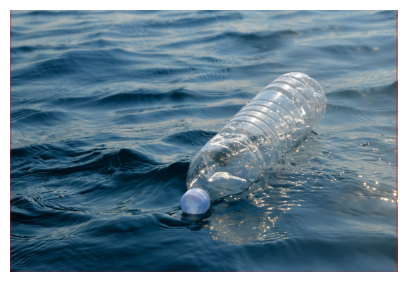

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLO model
model_path = r"E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat-Dataset\garbage_detection_model.pt"  # Update with the path to your trained weights file
model = YOLO(model_path)

# Path to the test image containing garbage
test_image_path = r"C:\Users\Sushmita Aich\Downloads\GettyImages-1176700286-scaled.jpg"  # Update with the image path

# Run inference on the test image
results = model(test_image_path, conf=0.5)  # Confidence threshold can be adjusted

# Load and display the image with predictions
def visualize_predictions(image_path, results):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw predictions on the image
    for result in results:
        for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
            x1, y1, x2, y2 = map(int, box)
            class_name = model.names[int(cls)]
            label = f"{class_name} {conf:.2f}"

            # Draw bounding box and label
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Visualize the predictions
visualize_predictions(test_image_path, results)



image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test1.jpg: 64x64 1 plastic bottles, 73.2ms
Speed: 9.3ms preprocess, 73.2ms inference, 16.3ms postprocess per image at shape (1, 3, 64, 64)


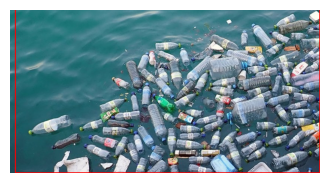


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test10.jpg: 64x64 1 plastic bottles, 1 xdeadfish, 20.6ms
Speed: 0.0ms preprocess, 20.6ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


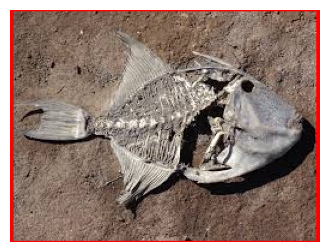


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test11.jpg: 64x64 1 plastic bottles, 28.1ms
Speed: 0.2ms preprocess, 28.1ms inference, 1.4ms postprocess per image at shape (1, 3, 64, 64)


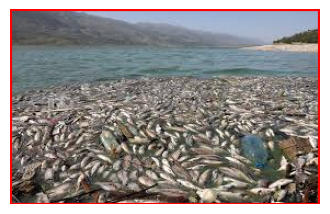


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test12.jpg: 64x64 (no detections), 24.8ms
Speed: 1.0ms preprocess, 24.8ms inference, 0.8ms postprocess per image at shape (1, 3, 64, 64)


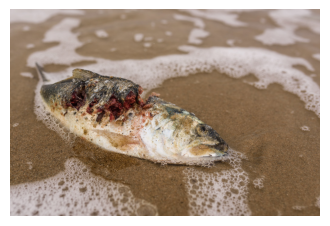


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test13.webp: 64x64 1 plastic bottles, 22.8ms
Speed: 0.0ms preprocess, 22.8ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)


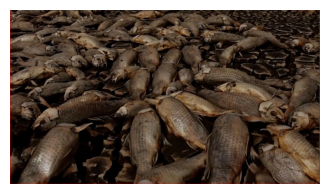


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test14.jpg: 64x64 1 plastic bottles, 29.9ms
Speed: 0.0ms preprocess, 29.9ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)


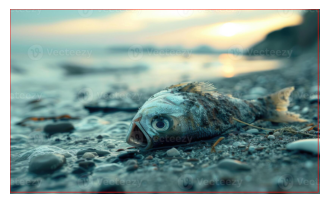


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test15.webp: 64x64 1 fish, 22.9ms
Speed: 0.0ms preprocess, 22.9ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)


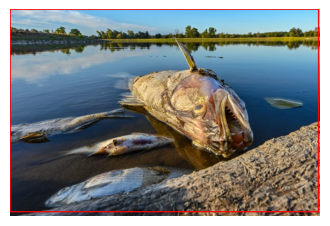


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test16.jpg: 64x64 (no detections), 26.4ms
Speed: 0.0ms preprocess, 26.4ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


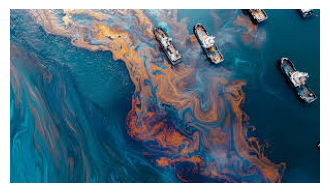


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test17.jpg: 64x64 1 container, 19.9ms
Speed: 0.3ms preprocess, 19.9ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


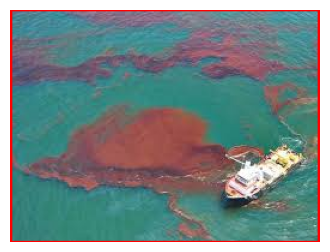


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test18.jpg: 64x64 1 fish, 1 plastic bottles, 19.5ms
Speed: 0.0ms preprocess, 19.5ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


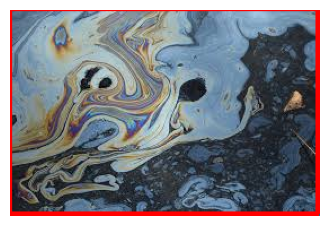


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test19.jpg: 64x64 (no detections), 19.8ms
Speed: 0.0ms preprocess, 19.8ms inference, 2.2ms postprocess per image at shape (1, 3, 64, 64)


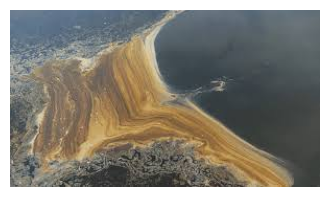


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test2.jpg: 64x64 1 plastic bottles, 15.8ms
Speed: 1.0ms preprocess, 15.8ms inference, 0.6ms postprocess per image at shape (1, 3, 64, 64)


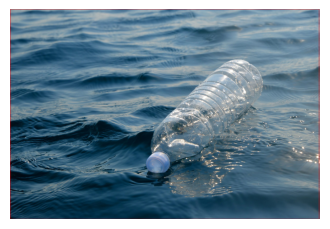


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test20.jpg: 64x64 1 fish, 1 plastic bottles, 19.3ms
Speed: 0.0ms preprocess, 19.3ms inference, 4.5ms postprocess per image at shape (1, 3, 64, 64)


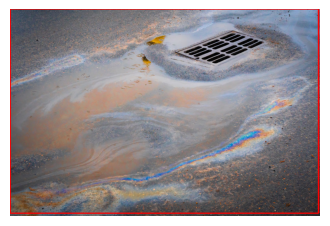


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test21.jpg: 64x64 1 fish, 1 plastic bottles, 18.7ms
Speed: 1.3ms preprocess, 18.7ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


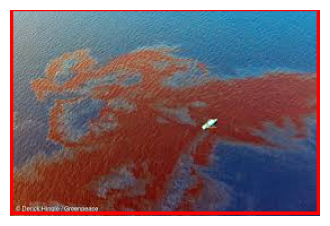


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test22.jpg: 64x64 1 xinbag, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)


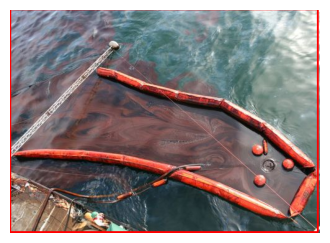


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test23.jpg: 64x64 1 fish, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 1.1ms postprocess per image at shape (1, 3, 64, 64)


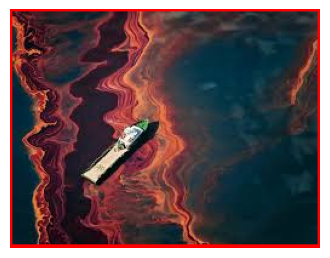


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test24.jpg: 64x64 1 fish, 26.8ms
Speed: 7.5ms preprocess, 26.8ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


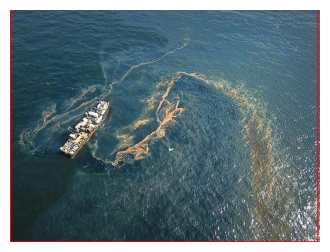


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test25.jpg: 64x64 1 fish, 22.8ms
Speed: 0.0ms preprocess, 22.8ms inference, 2.0ms postprocess per image at shape (1, 3, 64, 64)


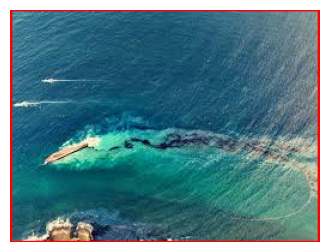


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test26.jpg: 64x64 1 fish, 20.0ms
Speed: 0.0ms preprocess, 20.0ms inference, 3.3ms postprocess per image at shape (1, 3, 64, 64)


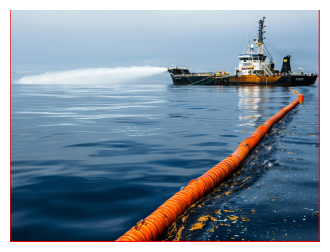


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test27.jpg: 64x64 1 xdeadfish, 21.0ms
Speed: 0.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)


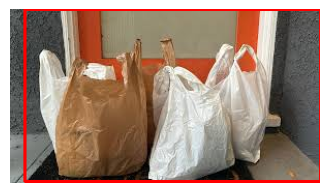


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test28.jpg: 64x64 1 container, 51.2ms
Speed: 0.0ms preprocess, 51.2ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


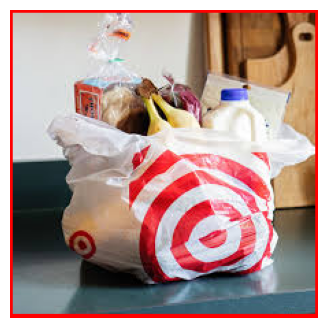


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test29.jpg: 64x64 1 container, 16.6ms
Speed: 0.0ms preprocess, 16.6ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


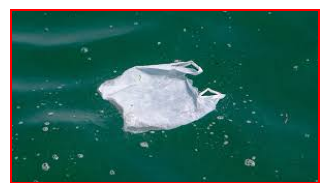


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test3.jpg: 64x64 1 plastic bottles, 18.7ms
Speed: 0.0ms preprocess, 18.7ms inference, 1.4ms postprocess per image at shape (1, 3, 64, 64)


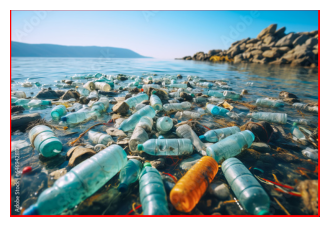


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test3.webp: 64x64 1 plastic bottles, 37.0ms
Speed: 0.0ms preprocess, 37.0ms inference, 3.2ms postprocess per image at shape (1, 3, 64, 64)


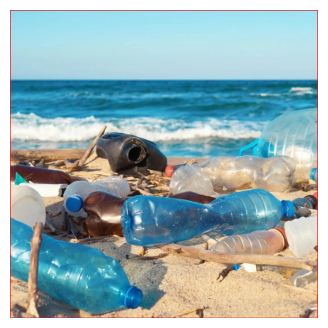


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test30.jpg: 32x64 (no detections), 15.2ms
Speed: 0.0ms preprocess, 15.2ms inference, 0.0ms postprocess per image at shape (1, 3, 32, 64)


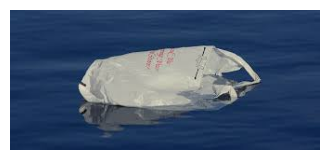


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test31.jpg: 64x64 1 plastic bottles, 42.7ms
Speed: 1.0ms preprocess, 42.7ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)


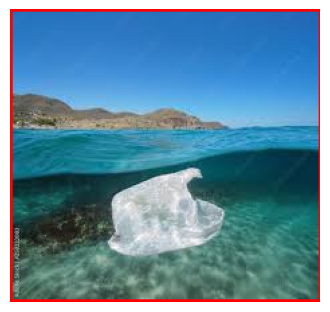


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test32.jpg: 64x64 1 container, 26.6ms
Speed: 0.0ms preprocess, 26.6ms inference, 1.9ms postprocess per image at shape (1, 3, 64, 64)


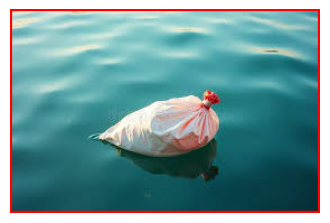


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test33.jpg: 64x64 1 plastic bottles, 15.0ms
Speed: 0.0ms preprocess, 15.0ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


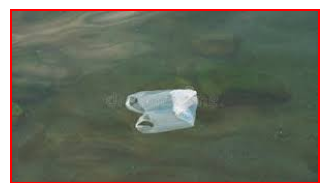


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test34.jpg: 64x64 1 plastic bottles, 26.7ms
Speed: 0.0ms preprocess, 26.7ms inference, 2.3ms postprocess per image at shape (1, 3, 64, 64)


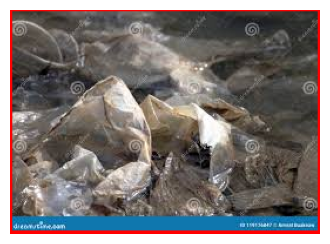


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test35.jpg: 64x64 1 plastic bottles, 18.5ms
Speed: 0.8ms preprocess, 18.5ms inference, 1.5ms postprocess per image at shape (1, 3, 64, 64)


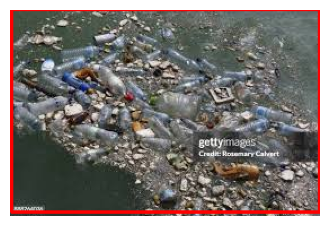


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test36.jpg: 64x64 1 plastic bottles, 18.2ms
Speed: 1.0ms preprocess, 18.2ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)


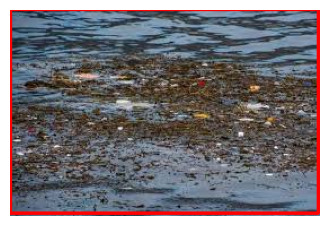


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test37.jpg: 32x64 2 plastic bottless, 28.3ms
Speed: 0.0ms preprocess, 28.3ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 64)


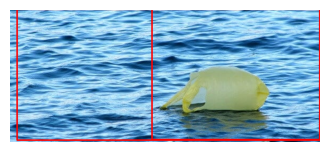


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test4.jpg: 32x64 1 plastic bottles, 17.3ms
Speed: 0.0ms preprocess, 17.3ms inference, 0.0ms postprocess per image at shape (1, 3, 32, 64)


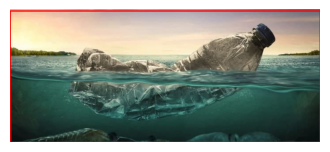


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test6.webp: 32x64 (no detections), 35.1ms
Speed: 0.0ms preprocess, 35.1ms inference, 1.0ms postprocess per image at shape (1, 3, 32, 64)


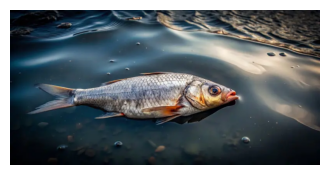


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\TEst7.jpg: 64x64 1 plastic bottles, 29.8ms
Speed: 0.0ms preprocess, 29.8ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


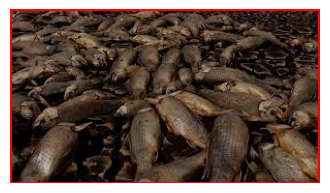


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test8.jpg: 64x64 1 fish, 28.0ms
Speed: 1.0ms preprocess, 28.0ms inference, 1.3ms postprocess per image at shape (1, 3, 64, 64)


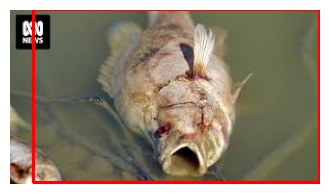


image 1/1 E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes\Test9.jpg: 64x64 1 plastic bottles, 32.7ms
Speed: 1.0ms preprocess, 32.7ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


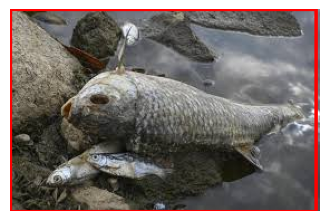

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load the trained YOLO model
model_path = r"E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\HydroFloat-Dataset\garbage_detection_model.pt"  # Update with your best weights path
model = YOLO(model_path)

# Path to the folder containing test images
test_images_folder = r"E:\3rd Year NOTES\A.I. & M.L\HYDRO_FLOAT\Custom Test Imgaes"  # Update with your folder path

# Function to visualize predictions
def visualize_predictions(image_path, results):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Draw predictions on the image
    for result in results:
        for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
            x1, y1, x2, y2 = map(int, box)
            class_name = model.names[int(cls)]
            label = f"{class_name} {conf:.2f}"

            # Draw bounding box and label
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display image with predictions
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Process and predict for each image in the folder
for image_name in os.listdir(test_images_folder):
    image_path = os.path.join(test_images_folder, image_name)
    
    if os.path.isfile(image_path) and image_name.lower().endswith(('.jpg', '.jpeg', '.png', 'webp')):
        # Run inference on the image
        results = model(image_path, conf=0.5)  # Confidence threshold can be adjusted

        # Visualize predictions without saving
        visualize_predictions(image_path, results)
